In [310]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt 

In [311]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## Načtení a spojení dat

In [313]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [314]:
len(df)

47419

In [315]:
df

,rok,titul,autorstvo,autorstvo_kod
001,,,,
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522
...,...,...,...,...
nkc20243601181,2024.0,Slon v šuplíku,Nejedlý Jan,ola2003165587
nkc20243601189,2024.0,Kampak jedou Pepa s Edou?,Hegerová Vendula,ola2003204967
nkc20243601266,2024.0,Isabela a červené šípky,Peroutková Ivana,jn20000401963


In [316]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [317]:
autority = autority.merge(pd.read_json(os.path.join('data_raw','wikidata_raw.json')), left_index=True, right_index=True, how="outer")

In [318]:
autority

,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,udalosti,role
aun2006372164,None,None,None,None,[aun2006372164],"[Ibn Ezra, Abraham,]",[asi 1092-1167.],[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372165,None,None,None,None,[aun2006372165],"[Abu Jusuf Jakub ben Ibrachim al-Kufi,]",[731-798.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372166,None,None,None,None,[aun2006372166],"[Abū al-Fatḥ ibn-Abī al-Ḥasan,]",[činný 14. století.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372167,None,None,None,None,[aun2006372167],"[Abū Maʿšar,]",[787-886.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Významné dílo arabské astrologie. Po světě ší...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aun2006372168,None,None,None,None,[aun2006372168],"[Adalwin,]",[činný 9. století.],[0],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmp20241237237,None,None,[1969],None,[zmp20241237237],"[Comoglio, Silvia,]",[1969-],[1],None,None,None,[Itálie],None,"[italská poezie, literární činnost]",None,"[spisovatelky, básnířky]",[žena],[ita],None,None,None,None,None,None,None,None,None,None,None,None,[Italská spisovatelka a básnířka.],None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zmp20241237239,None,None,None,None,[zmp20241237239],"[Friedman, Neile Sue]",None,[1],None,None,None,[Spojené státy americké],None,"[holocaust (1939-1945), perzekuce, přeživší ho...",None,[soudkyně],[žena],[eng],None,None,None,None,None,None,None,None,None,None,None,None,[Americká soudkyně.],None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zmp20241237241,[isni],[0000000497681884],[1928],[2012],[zmp20241237241],"[Ayalon, Eliezer,]",[1928-2012],[1],None,None,None,"[Polsko, Izrael]",None,None,None,[průvodci],[muž],"[pol, eng]","[Ayalon, Eli,]",[1928-2012],None,[1],None,None,None,None,None,None,None,None,[Polsko-izraelský průvodce a přeživší holocaust.],None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zmp20241237246,"[isni, wikidata]","[0000000109154514, Q7299117]",[1915],[1995],[zmp20241237246],"[Rosenthal, Raymond,]",[1915-1995],[1],None,None,None,[Spojené státy americké],None,"[překladatelská činnost, překlady z italštiny]",None,[překladatelé],[muž],"[eng, ita]",None,None,None,None,None,None,None,None,None,None,None,None,[Americký překladatel.],None,nz a22 n 4500,Q7299117,1914.0,1995.0,m,[Q30],None,None,[Q333634],"[de, ar, en]",None,None,None,None,None,None,None,None,None,None,None


In [319]:
df = df.merge(autority, left_on="autorstvo_kod", right_index=True, how="left")

In [320]:
len(df)

47419

In [321]:
def dva_letopocty(y, z):
    try:
        return int(re.search(r'\d{4}',str(y)).group(0))
    except:
        return z

In [322]:
df['narozeni'] = df.apply(lambda row: dva_letopocty(row['046_f'], row['w_narozeni']), axis=1)

In [323]:
df['umrti'] = df.apply(lambda row: dva_letopocty(row['046_g'], row['w_umrti']), axis=1)

In [324]:
df['vek'] = df['rok'] - df['narozeni']

Kolik lidí má uvedený věk:

In [326]:
len(df[df['vek'].notnull()]) / len(df)

0.8630717644825914

In [327]:
df = df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())]

In [328]:
len(df[df['vek'].notnull()]) / len(df)

0.9975342094567132

In [329]:
def tri_gendery(gender_aut, gender_wikidata, aut):
    z = None
    if (str(gender_aut).split(" ")[0][-1] == 'á'):
        z = 'á'
    else:
        z = 'neá'
    if gender_wikidata != None:
        z = gender_wikidata
    try:
        for y in gender_aut:
            if y == 'muž':
                z = 'm'
            if y == 'žena':
                z = 'f'
    except:
        pass
    return z

In [330]:
df['w_gender'].dropna()

001
cpk20041494224    m
bknjje05009       m
nkc20051626328    m
bkneli05212       m
bknmik11570       m
                 ..
nkc20243600987    f
nkc20243601002    f
nkc20243601079    m
nkc20243601189    f
nkc20243601266    f
Name: w_gender, Length: 34311, dtype: object

In [331]:
df['gender'] = df.apply(lambda row: tri_gendery(row['375_a'],row['w_gender'],row['autorstvo']), axis=1)

Kolik lidí má uvedený gender:

In [333]:
len(df[df['gender'].isin(['m','f'])]) / len(df)

0.9633112044438423

In [334]:
len(df[df['gender'].notnull()]) / len(df)

0.9666711827665628

In [335]:
df.groupby('gender').size()

gender
f      11389
m      24162
neá      122
tm         2
dtype: int64

In [336]:
df[['autorstvo','375_a','gender','046_f','046_g','narozeni','umrti']].sample(20)

,autorstvo,375_a,gender,046_f,046_g,narozeni,umrti
001,,,,,,,
nkc20213327365,Dvořák Otomar,None,m,[1951],None,1951.0,NaN
bknzdr10836,Hromádka Jan,None,m,[1854],[1928],1854.0,1928.0
nkc20112256811,Zima Pavel,None,NaN,[1969],None,1969.0,NaN
cpk20021087987,Šplíchal Antonín,None,m,[1947],None,1947.0,NaN
nkc20051631930,Ptáček Josef,None,m,[1945],None,1945.0,2023.0
nkc20071757052,Žáček Jiří,[muž],m,[1945],None,1945.0,NaN
bk195303995,Uždil František,None,m,[1903],[1966],1903.0,1966.0
cpk19980308042,Všetička František,[muž],m,[1932],None,1932.0,NaN
ck8802252,Horelová Eliška,[žena],f,[1925],[2015],1925.0,2015.0


## Explorace: gender

<Axes: xlabel='rok'>

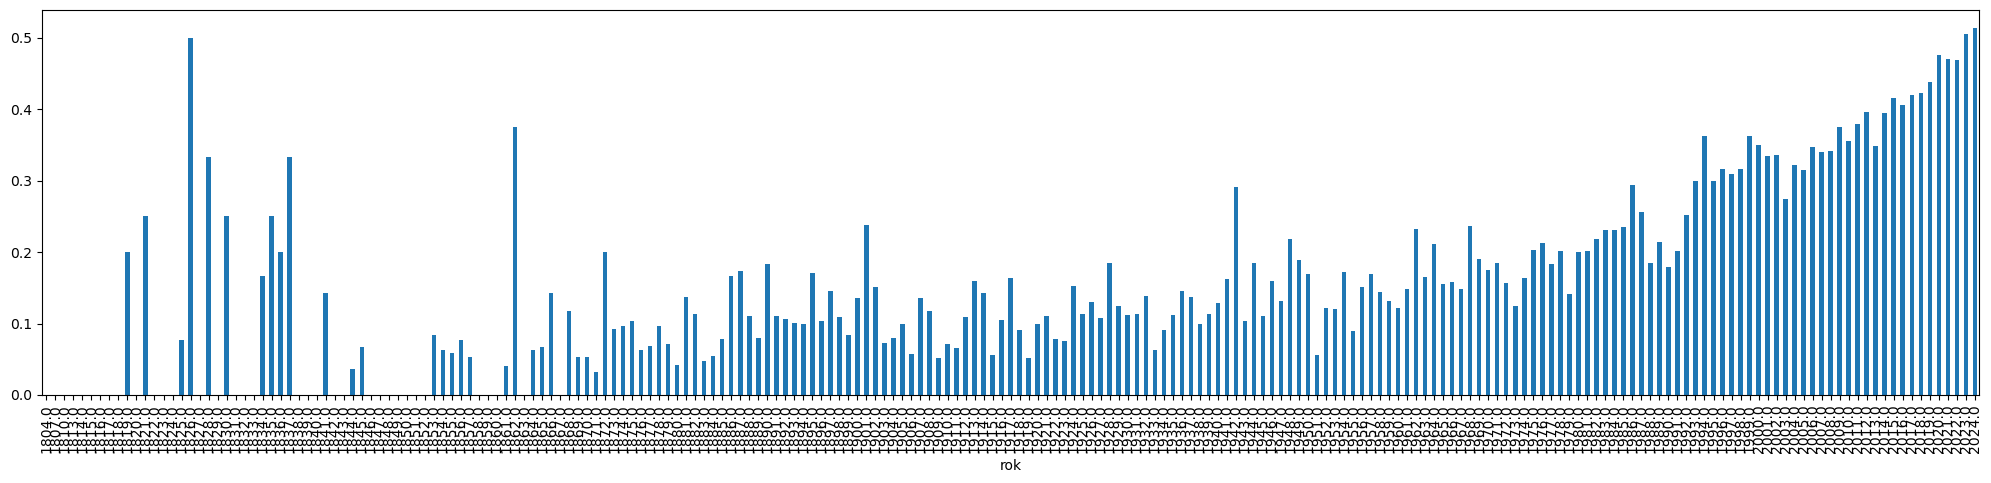

In [338]:
(df[df['gender'].isin(['á','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [339]:
kolikvyslo = df.groupby('rok').size()
kolikvyslo[kolikvyslo < 150].tail(1)

rok
1989.0    135
dtype: int64

In [340]:
(df[df['gender'].isin(['f','á'])].groupby('rok').size() / df[df['gender'].isin(['m','f','á','neá'])].groupby('rok').size()).tail(10)

rok
2015.0    0.422027
2016.0    0.409173
2017.0    0.423778
2018.0    0.428435
2019.0    0.441729
2020.0    0.481025
2021.0    0.473399
2022.0    0.473822
2023.0    0.509091
2024.0    0.517921
dtype: float64

In [341]:
(df[df['gender'] == 'f'].groupby('rok').size() / df[df['gender'].isin(['m','f'])].groupby('rok').size()).tail(10)

rok
2015.0    0.422852
2016.0    0.410650
2017.0    0.423778
2018.0    0.428844
2019.0    0.442561
2020.0    0.482398
2021.0    0.474255
2022.0    0.474236
2023.0    0.510121
2024.0    0.518851
dtype: float64

<Axes: xlabel='rok'>

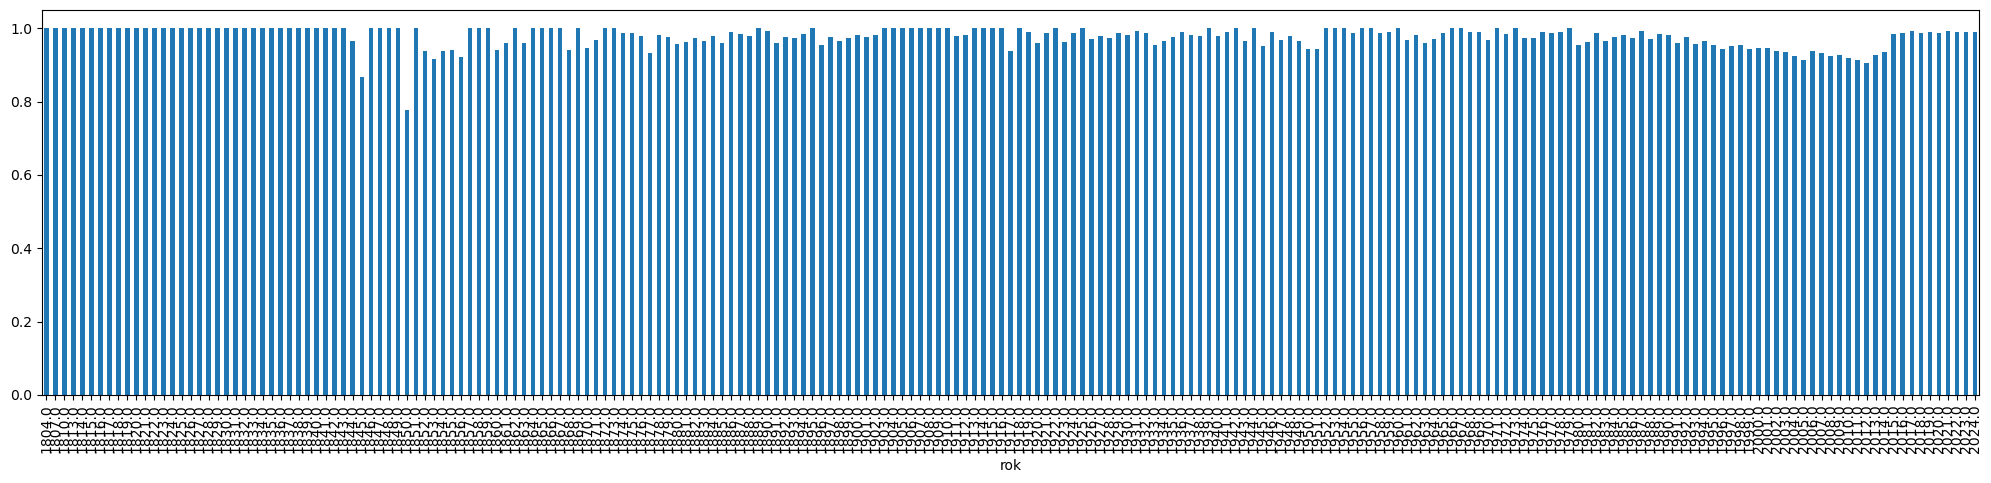

In [342]:
(df[df['gender'].isin(['m','f'])].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [343]:
df[(df['umrti'] < df['rok']) | (df['umrti'].isnull())].dropna(subset=['vek']).sort_values(by='vek',ascending=False)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041415652,2004.0,Písnička od Zlatého potoka,Hejzlar František,mzk2004250847,None,None,[1876],None,[mzk2004250847],"[Hejzlar, František,]",[1876-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 9.1.1876 v Bystré u Nového Města n.Me...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1876.0,NaN,128.0,NaN
nkc20091963778,2009.0,Na Tepenci,Talášek Adolf,jk01132028,None,None,[1882],None,[jk01132028],"[Talášek, Adolf,]",[1882-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 23.11.1882 v Olomouci. Účetní, prozaik.]",None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882.0,NaN,127.0,NaN
nkc20183008369,2018.0,Hra na schovávanou s veselými štěňátky,Cresswell Ray,ola2003193634,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,1900.0,NaN,m,None,None,None,[Q644687],[],None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,m
nkc20183008367,2018.0,Hra na schovávanou s kotětem a myšákem,Cresswell Ray,ola2003193634,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,1900.0,NaN,m,None,None,None,[Q644687],[],None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,m
nkc20152684941,2015.0,Exekuce,Vávra Rudolf,jk01141755,None,None,[1905],None,[jk01141755],"[Vávra, Rudolf,]",[1905-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 14.4.1905 v Praze. Novinář, překladat...",None,nz a22 n 4500,Q95166542,1905.0,NaN,m,None,[Q1085],None,"[Q1930187, Q333634, Q36180]",[],None,None,None,None,None,None,None,None,None,None,None,1905.0,NaN,110.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20172907907,1947.0,V táboře pod Malinovou horou,Lev František,xx0000991,None,None,[1948],None,[xx0000991],"[Lev, František,]",[1948-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.6.1948. Autor pověstí a legend.],None,nz a22 n 4500,Q95464666,1948.0,NaN,m,None,None,None,None,[],None,None,None,None,None,None,None,None,None,None,None,1948.0,NaN,-1.0,m
bk197201252,1972.0,V hudbě život,Kadlecová Marie Magdalena,jk01052463,"[isni, wikidata]","[0000000055603432, Q15928217]",None,None,[jk01052463],"[Kadlecová, Marie Magdalena]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletristka, autorka knih pro děti a biografi...",None,cz a22 n 4500,Q15928217,2000.0,NaN,f,[Q213],None,None,[Q36180],[cs],None,None,None,None,None,None,None,None,None,None,None,2000.0,NaN,-28.0,f
bknhra07814,1928.0,Na zapřenou,Sedláčková Anna,mzk2005274887,None,None,[1956],None,[mzk

In [344]:
df[df['vek'] > 110]

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041415652,2004.0,Písnička od Zlatého potoka,Hejzlar František,mzk2004250847,None,None,[1876],None,[mzk2004250847],"[Hejzlar, František,]",[1876-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 9.1.1876 v Bystré u Nového Města n.Me...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1876.0,NaN,128.0,NaN
nkc20091963778,2009.0,Na Tepenci,Talášek Adolf,jk01132028,None,None,[1882],None,[jk01132028],"[Talášek, Adolf,]",[1882-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 23.11.1882 v Olomouci. Účetní, prozaik.]",None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882.0,NaN,127.0,NaN
nkc20183008369,2018.0,Hra na schovávanou s veselými štěňátky,Cresswell Ray,ola2003193634,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,1900.0,NaN,m,None,None,None,[Q644687],[],None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,m
nkc20183008367,2018.0,Hra na schovávanou s kotětem a myšákem,Cresswell Ray,ola2003193634,None,None,None,None,[ola2003193634],"[Cresswell, Ray]",None,[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Německý ilustrátor knih pro mládež.],None,nz a22 n 4500,Q81422189,1900.0,NaN,m,None,None,None,[Q644687],[],None,None,None,None,None,None,None,None,None,None,None,1900.0,NaN,118.0,m


## Explorace: věk

<Axes: xlabel='vek'>

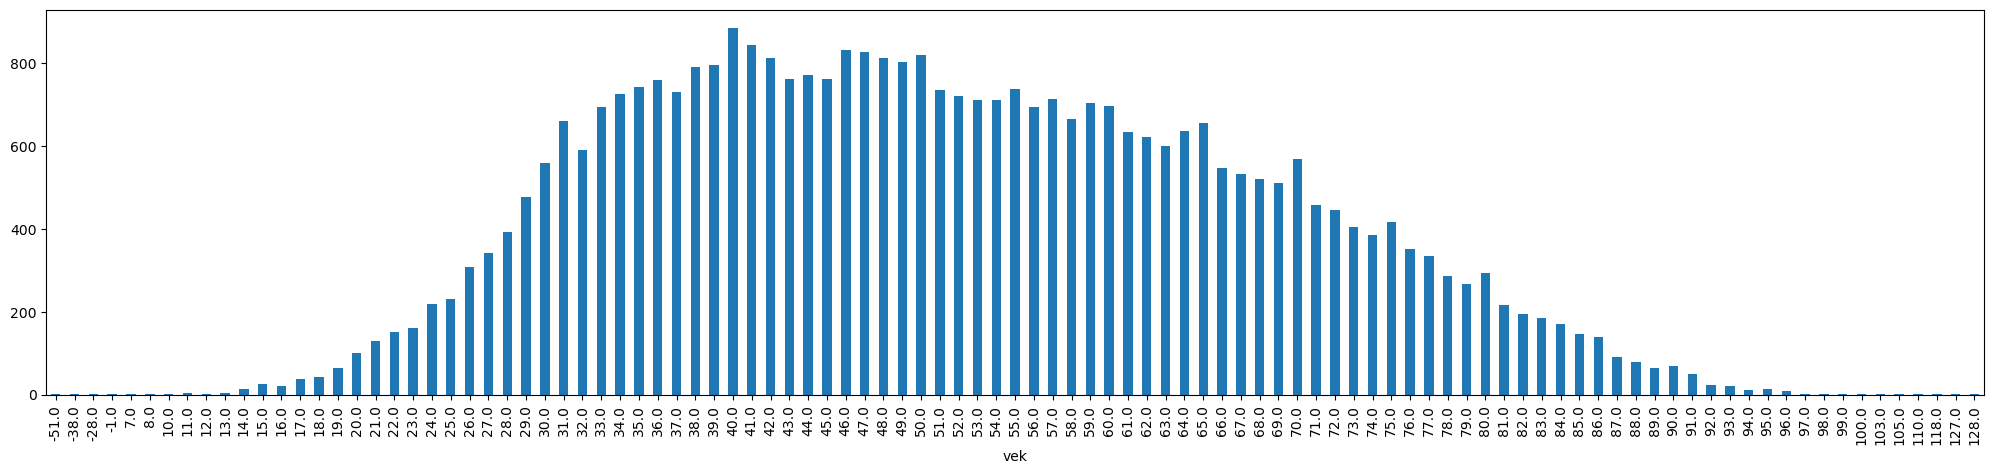

In [346]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())].groupby('vek').size().plot.bar(figsize=(25,5))

In [347]:
df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())]['vek'].median()

50.0

<Axes: xlabel='vek'>

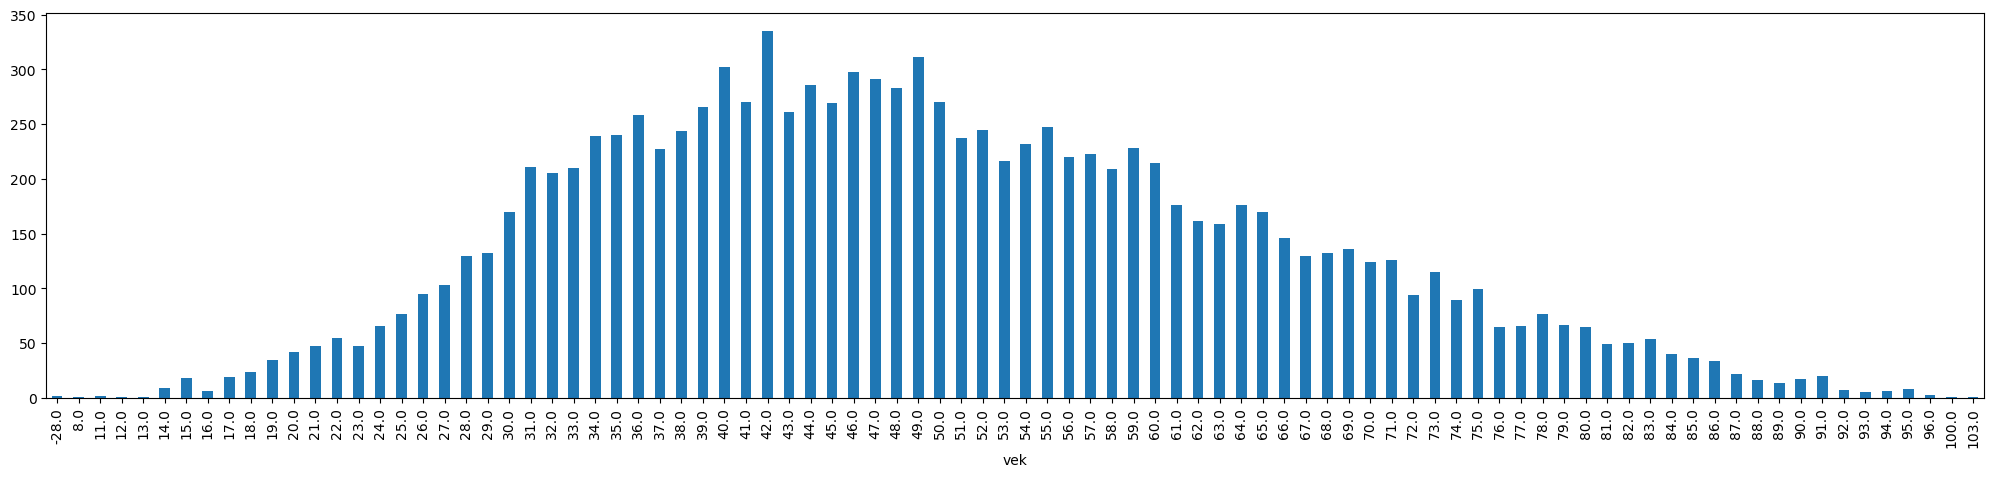

In [348]:
df[((df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())) & (df['gender'].isin(['f','á'])) ].groupby('vek').size().plot.bar(figsize=(25,5))

## Explorace: věk + gender

### Věky spisovatelstva publikujícího v posledních letech

In [419]:
df23 = df[df['rok'] >= 2019]

In [421]:
df23

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20193161954,2019.0,Jezevec Chrujda zakládá pěvecký sbor netopejrů,Stančík Petr,jo2008411895,None,None,[1968],None,[jo2008411895],"[Stančík, Petr,]",[1968-],[1],None,"[Rychnov nad Kněžnou, Česko]",None,[Česko],None,"[literatura, reklama a propagace, medievalisti...",None,"[spisovatelé, básníci, dramatici, reklamní pra...",[muž],[cze],None,None,None,None,None,None,None,None,"[Pečírka, Stanislav,, Stradický ze Strdic, Odi...","[Pseudonym:, Pseudonym:]","[1, 1]",None,[Narozen 9. 6. 1968 v Rychnově nad Kněžnou. Sp...,[http://cs.wikipedia.org/wiki/Petr_Stan%C4%8D%...,cz a22 n 4500,Q7178588,1968.0,NaN,m,[Q213],[Q1000091],None,"[Q36180, Q49757, Q214917, Q822146, Q17167049, ...","[es, en, cs, pl]",None,None,None,None,None,None,None,None,None,None,None,1968.0,NaN,51.0,m
nkc20193160527,2019.0,Pohádka o ovečkách.,Lukáš Ivo,jn20010309482,None,None,[1963],None,[jn20010309482],"[Lukáš, Ivo,]",[1963-],[1],None,None,None,[Česko],"[Brno, Česko]","[překladatelská činnost, vydavatelská činnost,...",[Barrister & Principal (nakladatelství)],"[nakladatelé a vydavatelé, překladatelé]",[muž],"[cze, eng, fre, ger]",None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 27. 7. 1963. Vydavatel. Překladatel z...,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963.0,NaN,56.0,m
nkc20193161955,2019.0,Realita šílenství,Měrka Petr,xx0062230,"[isni, wikidata]","[0000000055659233, Q19941812]",[1979],None,[xx0062230],"[Měrka, Petr,]",[1979-],[1],None,"[Vsetín, Česko]",None,[Česko],"[Valašská Polanka, Česko]","[literární tvorba, publicistika (literatura)]",None,"[spisovatelé, publicisté]",[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 5. 6. 1979 ve Vsetíně. Spisovatel a l...,None,cz a22 n 4500,Q19941812,1979.0,NaN,m,[Q213],[Q513417],None,"[Q36180, Q6051619]","[cs, pl]",None,None,None,None,None,None,None,None,None,None,None,1979.0,NaN,40.0,m
nkc20193160523,2019.0,Království neumírá,Vaňková Ludmila,jk01141586,"[wikidata, isni]","[Q12034213, 0000000055269534]",[1927],[2022],[jk01141586],"[Vaňková, Ludmila,]",[1927-2022],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, historická próza, vědecko-fantast...",None,[spisovatelky],[žena],[cze],"[Paukertová, Ludmila,]",[1927-2022],[Jméno získané sňatkem:],[1],None,None,None,None,None,None,None,None,"[Narozena 9. 5. 1927 v Praze, zemřela 3. 2. 20...",None,cz a22 n 4500,Q12034213,1927.0,2022.0,f,[Q213],[Q1085],None,"[Q36180, Q18844224, Q876864]","[cs, simple, sk, arz, en]",None,None,None,None,[Q31519],[Q12026477],None,None,None,None,[Q104716377],1927.0,2022.0,92.0,f
nkc20193160498,2019.0,Nejlepší sezona,Bochníček David,pna20191058983,None,None,[1975],None,[pna20191058983],"[Bochníček, David,]",[1975-],[1],None,None,None,[Česko],None,"[filmová režie, filmová scenáristika, literárn...",None,"[filmoví režiséři, filmoví scenáristé, spisova...",[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 1975. Režisér a scénárista krátkých f...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.0,NaN,44.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243600987,2024.0,Domino,Sombati Helena,xx0317808,[wikidata],[Q1

In [423]:
len(df23[df23['narozeni'].notnull()]) / len(df23)

1.0

In [425]:
veky_muzu23 = df23[((df23['rok'] <= df23['umrti']) | (df23['narozeni'].notnull() & df23['umrti'].isnull())) & (df23['gender'].isin(['m','neá'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [427]:
veky_zen23 = df23[((df23['rok'] <= df23['umrti']) | (df23['narozeni'].notnull() & df23['umrti'].isnull())) & (df23['gender'].isin(['f','á'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

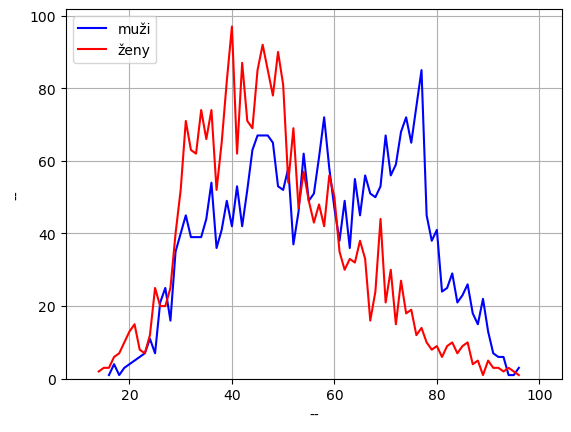

In [429]:
plt.plot(veky_muzu23, color="blue", label="muži")
plt.plot(veky_zen23, color="red", label="ženy")
plt.ylim(ymin=0)
plt.xlabel("--")
plt.ylabel("--")
plt.legend()
plt.legend(loc = "upper left")
plt.grid(True, which="both")
plt.show()

In [433]:
df23['vek'].median()

50.0

<Axes: xlabel='vek'>

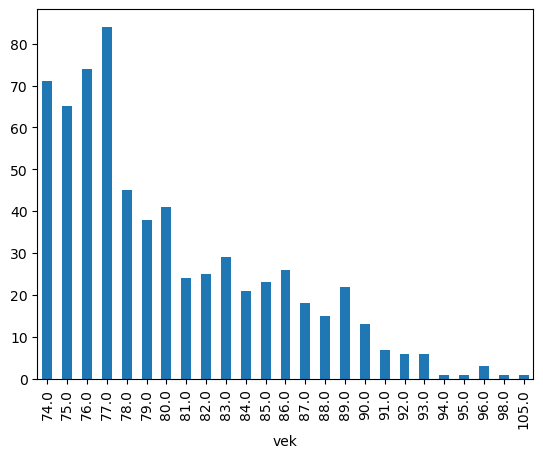

In [445]:
df23[(df23['gender'] == 'm') & (df23['vek'] > 73)].groupby('vek').size().plot.bar()

In [447]:
df23[(df23['gender'] == 'm') & (df23['vek'] == 77)]

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20193160304,2019.0,Sloneček Malej ve světě širém,Binar Ivan,jk01012120,"[isni, wikidata]","[0000000109097521, Q1675509]",[1942],None,[jk01012120],"[Binar, Ivan,]",[1942-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 25.6.1942 v Boskovicích. Prozaik, aut...",None,cz a22 n 4500,Q1675509,1942.0,NaN,m,"[Q213, Q33946]","[Q894440, Q8385]",None,"[Q36180, Q333634, Q1231865, Q1930187, Q876864,...","[bg, de, pl, sk, cs]",None,None,None,None,None,None,None,None,None,None,None,1942.0,NaN,77.0,m
nkc20203172271,2019.0,Horní hvozd,Kroutvor Josef,jn99240000542,None,None,[1942],None,[jn99240000542],"[Kroutvor, Josef,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, dějiny umění, výtvarné umění, ško...",None,"[spisovatelé, básníci, historici umění, kreslí...",[muž],[cze],"[Josef K.,]",[1942-],None,[0],None,None,None,None,None,None,None,None,[Narozen 30. 3. 1942 v Praze. Muzejní pracovní...,[https://cs.wikipedia.org/wiki/Josef_Kroutvor],cz a22 n 4500,Q12026289,1942.0,NaN,m,"[Q213, Q33946]",[Q1085],None,"[Q36180, Q49757, Q1792450, Q3391743, Q21550346...","[de, cs]",None,None,None,None,[Q31519],None,None,None,None,None,None,1942.0,NaN,77.0,m
nkc20193163232,2019.0,Morytáty ze Žižkova,Slavíček Jiří,mzk2005295078,None,None,[1942],None,[mzk2005295078],"[Slavíček, Jiří,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, detektivní literatura, literatura...",None,[spisovatelé],[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30. 7. 1942 v Praze. Spisovatel, auto...",[https://cs.wikipedia.org/wiki/Ji%C5%99%C3%AD_...,cz a22 n 4500,Q27869532,1942.0,NaN,m,"[Q33946, Q213]",[Q1085],None,[Q36180],[cs],None,None,None,None,None,None,None,None,None,None,None,1942.0,NaN,77.0,m
nkc20193092331,2019.0,Poslední vandr na Zlaté řece,Slavíček Jiří,mzk2005295078,None,None,[1942],None,[mzk2005295078],"[Slavíček, Jiří,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, detektivní literatura, literatura...",None,[spisovatelé],[muž],[cze],None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 30. 7. 1942 v Praze. Spisovatel, auto...",[https://cs.wikipedia.org/wiki/Ji%C5%99%C3%AD_...,cz a22 n 4500,Q27869532,1942.0,NaN,m,"[Q33946, Q213]",[Q1085],None,[Q36180],[cs],None,None,None,None,None,None,None,None,None,None,None,1942.0,NaN,77.0,m
nkc20193101029,2019.0,Lesní eseje,Kroutvor Josef,jn99240000542,None,None,[1942],None,[jn99240000542],"[Kroutvor, Josef,]",[1942-],[1],None,"[Praha, Česko]",None,[Česko],None,"[literatura, dějiny umění, výtvarné umění, ško...",None,"[spisovatelé, básníci, historici umění, kreslí...",[muž],[cze],"[Josef K.,]",[1942-],None,[0],None,None,None,None,None,None,None,None,[Narozen 30. 3. 1942 v Praze. Muzejní pracovní...,[https://cs.wikipedia.org/wiki/Josef_Kroutvor],cz a22 n 4500,Q12026289,1942.0,NaN,m,"[Q213, Q33946]",[Q1085],None,"[Q36180, Q49757, Q1792450, Q3391743, Q21550346...","[de, cs]",None,None,None,None,[Q31519],None,None,None,None,None,None,1942.0,NaN,77.0,m
nkc20193155629,2019.0,"Čárlí, kluk z fary",Veselý Pavel,jk01142207,None,None,[1942],None,[jk01142207],"[Veselý, Pavel,]",[1942-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 27. 4. 1942 v Ostravě . Hudební publi...,[http://cs.wikipedia.org/wiki/Pavel_Vesel%C3%BD],cz a22 n 4500,Q12044297,1942.0,Na

### Věky spisovatelstva, které debutovalo v letech 1995-2005

In [358]:
debuty = df.groupby('autorstvo_kod')['rok'].min()

In [359]:
debutanstvo_x = debuty[debuty.isin([x for x in range(1995,2005)])].index.to_list()

In [360]:
davne_autorstvo = df[df['rok'] < 1980]['autorstvo_kod'].drop_duplicates().to_list()
df2 = df[~df['autorstvo_kod'].isin(davne_autorstvo)]

In [361]:
df2 = df[df['autorstvo_kod'].isin(debutanstvo_x)]

In [362]:
veky_muzu = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['m','neá'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

In [363]:
veky_zen = df2[((df2['rok'] <= df2['umrti']) | (df2['narozeni'].notnull() & df2['umrti'].isnull())) & (df2['gender'].isin(['f','á'])) ].groupby('vek').size().reindex([i for i in range(0,101)])

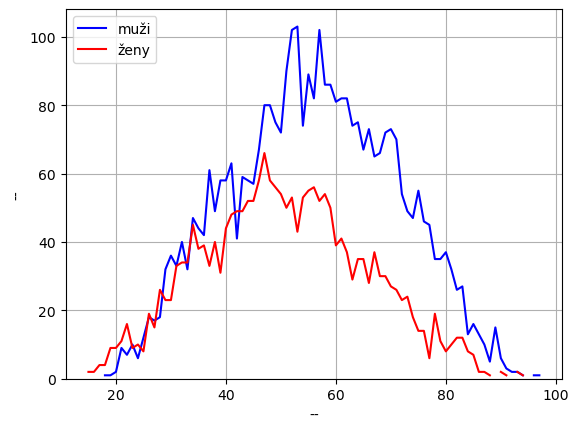

In [364]:
plt.plot(veky_muzu, color="blue", label="muži")
plt.plot(veky_zen, color="red", label="ženy")
plt.ylim(ymin=0)
plt.xlabel("--")
plt.ylabel("--")
plt.legend()
plt.legend(loc = "upper left")
plt.grid(True, which="both")
plt.show()

In [365]:
df.sort_values(by='vek').head(30)

,rok,titul,autorstvo,autorstvo_kod,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,w_narozeni,w_umrti,w_gender,obcanstvi,w_misto_narozeni,w_misto_umrti,profese,jazykove_verze,druh_umrti,pricina_umrti,vezeni,strany,skoly,manzelstvo,partnerstvo,potomstvo,sourozenectvo,udalosti,role,narozeni,umrti,vek,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjms02100,1889.0,Z přírody,Doubek František,jk01022862,None,None,[1940],[2011],[jk01022862],"[Doubek, František,]",[1940-2011],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 21. 4. 1940 v Milevsku, zemřel 11. 12...",None,cz a22 n 4500,Q95387632,1940.0,2011.0,m,None,[Q1015011],[Q158245],"[Q37226, Q1028181, Q644687, Q1925963]",[cs],None,None,None,None,None,None,None,None,None,None,None,1940.0,2011.0,-51.0,m
bk192805257,1928.0,Cesta osudu,Ledecký Vladimír,jx20080917017,None,None,None,None,[jx20080917017],"[Ledecký, Vladimír]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletrista, autor románu Cesta osudu, Zničený...",None,cz a22 n 4500,Q104778546,1966.0,NaN,m,[Q214],[Q242478],None,[Q82955],"[sk, en]",None,None,None,[Q64729826],[Q9366812],None,None,[Q101421294],None,None,None,1966.0,NaN,-38.0,m
nkc20081819672,1928.0,Zničený život,Ledecký Vladimír,jx20080917017,None,None,None,None,[jx20080917017],"[Ledecký, Vladimír]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletrista, autor románu Cesta osudu, Zničený...",None,cz a22 n 4500,Q104778546,1966.0,NaN,m,[Q214],[Q242478],None,[Q82955],"[sk, en]",None,None,None,[Q64729826],[Q9366812],None,None,[Q101421294],None,None,None,1966.0,NaN,-38.0,m
bk197201252,1972.0,V hudbě život,Kadlecová Marie Magdalena,jk01052463,"[isni, wikidata]","[0000000055603432, Q15928217]",None,None,[jk01052463],"[Kadlecová, Marie Magdalena]",None,[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Beletristka, autorka knih pro děti a biografi...",None,cz a22 n 4500,Q15928217,2000.0,NaN,f,[Q213],None,None,[Q36180],[cs],None,None,None,None,None,None,None,None,None,None,None,2000.0,NaN,-28.0,f
bknhra07814,1928.0,Na zapřenou,Sedláčková Anna,mzk2005274887,None,None,[1956],None,[mzk2005274887],"[Sedláčková, Anna,]",[1956-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozena 1956. Ing., knihovnice, autorka bibl...",None,nz a22 n 4500,Q112390437,1956.0,NaN,f,None,None,None,[Q182436],[],None,None,None,None,None,None,None,None,None,None,None,1956.0,NaN,-28.0,f
nkc20172907907,1947.0,V táboře pod Malinovou horou,Lev František,xx0000991,None,None,[1948],None,[xx0000991],"[Lev, František,]",[1948-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.6.1948. Autor pověstí a legend.],None,nz a22 n 4500,Q95464666,1948.0,NaN,m,None,None,None,None,[],None,None,None,None,None,None,None,None,None,None,None,1948.0,NaN,-1.0,m
cpk20000529314,1875.0,Mařenka,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozen 16.9.1876 v Hoříněvsi u Hradce Králov...,None,nz a22 n 4500,Q95208555,1876.0,1937.0,m,None,[Q1632205],[Q180139],"[Q37226, Q1056391]",[],None,None,None,None,None,None,None,None,None,None,None,1876.0,1937.0,-1.0,m
cpk20000529316,1875.0,Tři stužky,Andrle František,jk01010286,None,None,[1876],[1937],[jk01010286],"[Andrle, František,]",[1876-1937],[1],None,None,None,[Česko],None,None,

In [366]:
df.groupby('autorstvo')['autorstvo_kod'].nunique().nlargest()

autorstvo
Svoboda Jiří        5
Novák Jaroslav      4
Černý Karel         4
Švarc Václav        4
Dvořáková Helena    3
Name: autorstvo_kod, dtype: int64

In [367]:
len(df[(df['rok'] <= df['umrti']) | (df['narozeni'].notnull() & df['umrti'].isnull())])

36905